In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

In [13]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

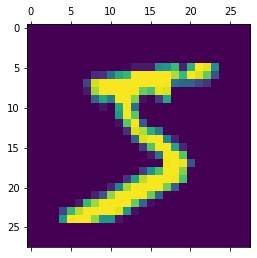

In [6]:
plt.matshow(X_train[0])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [34]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [30]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [31]:
from tensorflow import keras

model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [32]:
# cnn.fit(X_train,y_train,epochs=5)



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 57s 23ms/step - loss: 0.1699 - accuracy: 0.9505
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0570 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0383 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0267 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0187 - accuracy: 0.9940


In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 13s 7ms/step - loss: 0.0438 - accuracy: 0.9871


[0.043812818825244904, 0.9871000051498413]

In [37]:
y_pred=model.predict(X_test)
y_pred[0]

array([4.6978009e-01, 3.0153394e-03, 9.2303205e-01, 8.4035885e-01,
       1.9059777e-03, 1.0453463e-03, 4.5645524e-05, 9.9999928e-01,
       3.3844203e-01, 1.1782265e-01], dtype=float32)

In [39]:
y_pred=[np.argmax(i) for i in y_pred]
y_pred[:5]

[0, 0, 0, 0, 0]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)